## Question1

### (a) Cross entropy

In [1]:
import numpy as np
from PIL import Image
from math import log2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# function that returns the normalzed histogram of a gray scale image 
def img_hist(img_path):
    image = np.array(Image.open(img_path))
    m=len(image)
    n=len(image[0])
    count =[]
    r = []
    for k in range(0, 256):
        r.append(k)
        count1 = 0
        for i in range(m):
            for j in range(n):
                if image[i, j]== k:
                    count1+= 1
        count.append(count1/(m*n))          
    return (r, count)

In [3]:
#entropy function
def entropy(P):
    P = [i for i in P if i != 0]
    entropy = -sum([P[i] * log2(P[i]) for i in range(0,len(P))]) 
    return entropy

In [4]:
#function to calculate KL divergence between two PMFs
def kl_divergence(p,q):    
    for i in range(len(p)):
        D =  sum([p[i] * log2(p[i]/q[i]) if p[i]>0 else 0 for i in range(0,len(p))]) 
    return D

In [5]:
#function to calculate the cross entropy between two PMFs
def cross_ent(p,q):
    return entropy(p) + kl_divergence(p,q)

#### (i) 

In [6]:
a1,p=img_hist('left.png')
a2,q=img_hist('right.png')

In [7]:
#cross entropy between the above two images 
print(f"The cross entropy between the two images is {cross_ent(p,q)}")

The cross entropy between the two images is 7.273398119987328


#### (ii) 

In [8]:
# let p ∼ Bern(r) and q ∼ Bern(s) 
# r is fixed r=0.5 
X=[0,1]
r=0.5
s=np.arange(0.1,1,0.1)
p=[]
for x in X:
    p.append((r**x)*((1-r)**(1-x)))
q =[]
cross_en_output=[]
for i in s:
    for x in X:
        q.append((i**x)*((1-i)**(1-x)))
    cross_en_output.append(cross_ent(p,q))
    q=[]

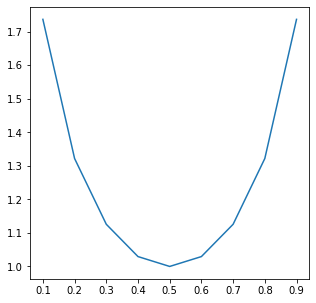

In [9]:
#plotting H(p,q) v/s s
plt.figure(figsize=(5,5))
plt.plot(s,cross_en_output)

Yes, minimizing H(p, q) give us matched PMFs at s=0.5

### (b) Jensen Shannon (JS) Divergence

In [10]:
#function to calculate JS divergence
def JS_divergence(p,q):
    m=[]
    for i in range(len(p)):
        m.append((p[i]+q[i])/2)
    J=kl_divergence(p,m)+kl_divergence(q,m)
    return J

In [11]:
a1,p=img_hist('left.png')
a2,q=img_hist('right.png')

print(f"JS divergence between p and q is {JS_divergence(p,q)}")
print(f"JS divergence between q and p is {JS_divergence(q,p)}")

JS divergence between p and q is 0.0073460795386296514
JS divergence between q and p is 0.0073460795386296514


we can see from the above result that Jensen Shannon Divergence is symmetric

### (c) Wasserstein Distance

In [12]:
def check_for_pi(P,r_x,s_y):
    size=(len(P),len(P[0]))
    r_x=[round(num) for num in r_x]
    s_y=[round(num) for num in s_y]
    marginal_x=[]
    marginal_y=[]
    for x in range(size[0]):
        count=0.0
        for y in range(size[1]):
            count=count+P[x][y]
        marginal_x.append(count)
        
    for y in range(size[1]):
        count=0.0
        for x in range(size[0]):
            count=count+P[x][y]
        marginal_y.append(count)
    
    marginal_x=[round(num) for num in marginal_x]
    marginal_y=[round(num) for num in marginal_y]

    if(marginal_x==r_x and marginal_y==s_y):
        print("The joint PDF belongs to Pi(r,s)")
    else:
        print("The joint PDF doesn't belong to Pi(r,s)")

A positive example

In [13]:
P=[[1/6,1/4,1/8],
  [1/8,1/6,1/6]]

r_x=[13/24,11/24]
s_y=[7/24,5/12,7/24]

check_for_pi(P,r_x,s_y)


The joint PDF belongs to Pi(r,s)


A negative example

In [14]:
P=[[1/6,1/8,1/2],
  [1/8,1/6,1/6]]

r_x=[13/24,11/24]
s_y=[7/24,5/12,7/24]

check_for_pi(P,r_x,s_y)

The joint PDF doesn't belong to Pi(r,s)


## Question2

### 2.a.i
The crowding problem arises from the exponential volume difference between high-dimensional and low-dimensional spaces.  Here is an example to illustrate the problem. Let's say we want to visualize uniformly sampled points from a ten-dimensional hypercube as two-dimensional points on a map. Furthermore, suppose that our cost function C(Y) successfully preserves as much of the local structure as possible. As a result, the map has to model points that are only slightly similar far apart from each other. Because many pairs of points are similar, they would all like to be closer together on the map. Due to this, the low-dimensional map becomes crowded because of these pairs of similar points.


### 2.a.ii
In the low-dimensional map, student t-distributions with a lower (single) degree of freedom can be used because (1+kyi-yjk 2 ) *1 approaches an inverse square law for large pairwise distances kyi-yjk. For map points that are far apart, this means the joint probabilities are almost invariant to changes in map scale. As a result, the optimization will work the same way for large clusters of points even if the points are far apart.


### 2.a.iii
In the scale of low dimension probability, there is a large difference between t-SNE and SNE. This is due to the fact that t-SNE employs the t-distribution to compute the conditional probability in low dimensional space, resulting in a wider dispersion of data projection. Furthermore, it causes T-SNE to have a smaller error than SNE.


### 2(b) and 2(c)

In [15]:
X = []
mean1 = np.ones(10)
mean2 = 10 * np.ones(10)
I = np.identity(10)
matrix = 0.01 * I
cluster1 = np.random.multivariate_normal(mean1, matrix, 10)
cluster2 = np.random.multivariate_normal(mean2, matrix, 10)
X = cluster1.tolist() + cluster2.tolist()
X = np.array(X)
Y = np.ones(10).tolist() + (2*np.ones(10)).tolist()
Y = np.array(Y)

In [16]:
tsne = TSNE(random_state=123).fit_transform(X)
tsne=np.transpose(tsne)
print(tsne.shape)

(2, 20)


/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


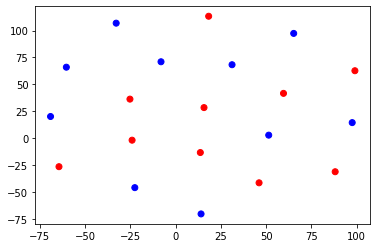

In [17]:
colors = ['red','red','red','red','red','red','red','red','red','red','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue']
plt.scatter(tsne[0],tsne[1],marker='o',c = colors)
plt.show()

#### t-SNE plots for different choices of perplexity .

/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


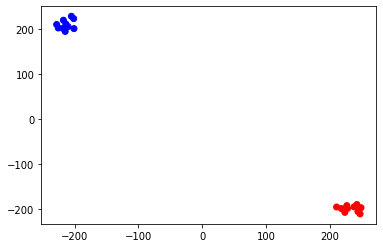

/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


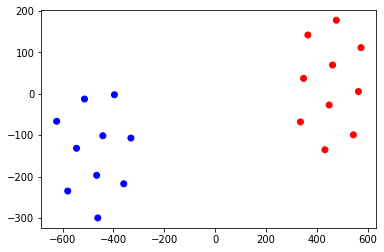

/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


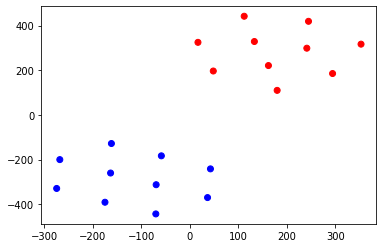

/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


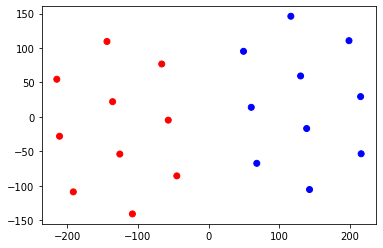

In [18]:
perplexity=[5,10,12,16]
for p in perplexity:
    tsne = TSNE(random_state=123,perplexity=p).fit_transform(X)
    tsne=np.transpose(tsne)
    plt.scatter(tsne[0],tsne[1],marker='o',c = colors)
    plt.show()
    

We can observe from the above plots that , the more the value of perplexity, the more scattered the cluster points are!

## Question3 

### (a) Convolution 

In [19]:
import matplotlib.image as img
Img = img.imread('4.1.01.tiff')
W,H,C=Img.shape

Img=Img.transpose(2, 0, 1)

In [20]:
#function that takes care of relection padding of the give image on all the edges
def padding(kernel_size,image):
    W,H=image.shape
    pad_size=kernel_size-1   #number of layers of pad
    padded_image=[[0]*(W+2*(kernel_size-1))]*(H+2*(kernel_size-1))
    padded_image=np.asarray(padded_image)
    padded_image[pad_size:pad_size+W, pad_size:pad_size+H] = image

    #row padding
    for i in range(pad_size):
        padded_image[i,pad_size:pad_size+H]=image[pad_size-1-i]  
        padded_image[W+2*kernel_size-2-(i+1),pad_size:pad_size+H] = image[W-(pad_size-i)]
    #column padding
    for j in range(pad_size):
        padded_image[:,j]=padded_image[:,2*pad_size-(j+1)]
        padded_image[:,(H+2*kernel_size-2)-(j+1)]=padded_image[:,(H+2*kernel_size-2)-(2*pad_size-j)]
        
    return padded_image


In [21]:
def convolution(image, kernel):
    J=padding(kernel.shape[0],image)
    kernel = np.flipud(np.fliplr(kernel))    #flipping the kernel
    conv_img=[[0]*(image.shape[0]+kernel.shape[0]-1)]*(image.shape[1]+kernel.shape[1]-1)
    for m in range(len(conv_img)):
        for n in range(len(conv_img[0])):
            sum1=0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[0]):
                    sum1=sum1+(kernel[k,l]*J[m+k,l+n])                    
            conv_img[m][n]=sum1   
    plt.imshow(J)
    return J

In [22]:
#helper function to add two lists
def add_lits(a,b):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j]=a[i][j]+b[i][j]
    return a

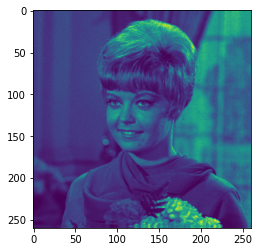

In [23]:
x = [[1,2,1],[2,4,2],[1,1,1]]
KERNEL = np.stack((x,x,x),2)/16
k=KERNEL.shape[0]

res=[[0]*(W+k-1)]*(H+k-1)

out=add_lits(convolution(Img[0],KERNEL[0]),convolution(Img[1],KERNEL[1]))  #adding the outputs of first 2 channels
out=add_lits(out,convolution(Img[2],KERNEL[2]))                            #adding the previous output to the final channel's output
plt.imshow(out)

### (b) Correlation 

In [24]:
def Correlation(image, kernel):
    J=padding(kernel.shape[0],image)
    conv_img=[[0]*(image.shape[0]+kernel.shape[0]-1)]*(image.shape[1]+kernel.shape[1]-1)
    for m in range(len(conv_img)):
        for n in range(len(conv_img[0])):
            sum1=0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[0]):
                    sum1=sum1+(kernel[k,l]*J[m+k,l+n])                    
            conv_img[m][n]=sum1   
    plt.imshow(J)
    return J

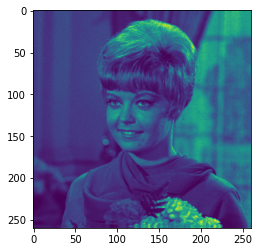

In [25]:
x = [[1,2,1],[2,4,2],[1,1,1]]
KERNEL = np.stack((x,x,x),2)/16
k=KERNEL.shape[0]

res=[[0]*(W+k-1)]*(H+k-1)

out=add_lits(Correlation(Img[0],KERNEL[0]),Correlation(Img[1],KERNEL[1]))
out=add_lits(out,Correlation(Img[2],KERNEL[2]))
plt.imshow(out)

#### Extracting kernel of arbitary size from input image and convoluting/correlating

In [28]:
#extract arbitrary kernel from the image 
kernel_from_img=Img[:,0:10,0:10]

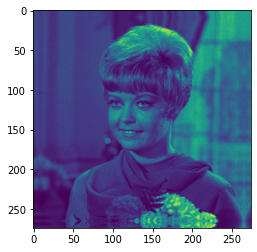

In [29]:
out=add_lits(convolution(Img[0],kernel_from_img[0]),convolution(Img[1],kernel_from_img[1]))
out=add_lits(out,convolution(Img[2],kernel_from_img[2]))
plt.imshow(out)

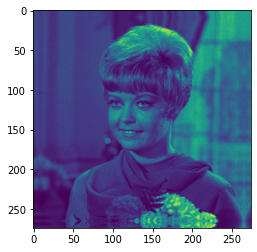

In [30]:
out=add_lits(Correlation(Img[0],kernel_from_img[0]),Correlation(Img[1],kernel_from_img[1]))
out=add_lits(out,Correlation(Img[2],kernel_from_img[2]))
plt.imshow(out)